In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
import seaborn as sns
import scipy.stats as st

matplotlib.style.use('ggplot')

In [2]:
#Read dataset

f = r'house-prices-advanced-regression-techniques\sample_submission.csv'
g = r'house-prices-advanced-regression-techniques\test.csv'
h = r'house-prices-advanced-regression-techniques\train.csv'

df = pd.read_csv(f)
print(f'Shape of df data: {df.shape}')
test_df = pd.read_csv(g)
print(f'Shape of test data: {test_df.shape}')
train_df = pd.read_csv(h)
print(f'Shape of train data: {train_df.shape}')

Shape of df data: (1459, 2)
Shape of test data: (1459, 80)
Shape of train data: (1460, 81)


Dataset yang akan digunakan hanya berupa `train_df` dan memiliki jumlah baris dan kolom **1460** dan **81**.

In [3]:
# Check duplicated data

train_df.duplicated().any()

False

# Basic

## No.1 

Tunjukkan statistika deskriptif untuk variabel harga rumah
(Column Name : SalePrice)!

Ceritakan kepada tim bisnis apa makna dari nilai nilai
tersebut!

In [4]:
x = train_df.SalePrice
x.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Nilai mean > median, maka distribusi data `SalePrice` berupa **skew positif**

In [5]:
# Stasistic values

mean = round(x.mean(),3)
med = round(x.median(),3)
std = round(x.std(),3)
mod = round(x.mode()[0], 3)
iql = round(x.quantile(0.75)-x.quantile(0.25), 3)
mn = round(x.quantile(0.25)-1.5*iql, 3)
mx = round(x.quantile(0.75)+1.5*iql, 3)
rng = round(x.max()-x.min())

In [6]:
# Insight

print("\nTerdapat nilai yang menyatakan ukuran pemusatan atau karakteristik dalam sekumpulan data, khususnya modus, median, atau (paling umum) rata-rata.")
print("Rerata dihitung dengan membagi jumlah nilai dalam kumpulan data dengan jumlah data. Median menunjukkan atau berhubungan dengan suatu nilai atau besaran yang terletak di titik tengah distribusi frekuensi dari nilai atau besaran yang diamati. Modus merupakan nilai yang memiliki frekuensi paling besar yang terdapat pada kumpulan data")
print(f"Rerata : {mean}, Median : {med}, Modus : {mod}")
print("\nNilai yang menyatakan ukuran penyebaran data yaitu simpangan baku (atau dapat juga variansi), interkuartil dan jangkauan.")
print("Simpangan baku menyatakan mengukur seberapa jauh setiap nilai dalam sekumpulan data dari rata-ratanya. Interkuartil mengukur penyebaran bagian tengah data, yaitu dari kuartil 1 hingga kuartil 3. Sedangkan jangkauan menyatakan rentang nilai yang terdapat dari kumpulan data.")
print(f"Simpangan baku : {std}, Interkuartil : {iql}, jangkauan : {rng}")


Terdapat nilai yang menyatakan ukuran pemusatan atau karakteristik dalam sekumpulan data, khususnya modus, median, atau (paling umum) rata-rata.
Rerata dihitung dengan membagi jumlah nilai dalam kumpulan data dengan jumlah data. Median menunjukkan atau berhubungan dengan suatu nilai atau besaran yang terletak di titik tengah distribusi frekuensi dari nilai atau besaran yang diamati. Modus merupakan nilai yang memiliki frekuensi paling besar yang terdapat pada kumpulan data
Rerata : 180921.196, Median : 163000.0, Modus : 140000

Nilai yang menyatakan ukuran penyebaran data yaitu simpangan baku (atau dapat juga variansi), interkuartil dan jangkauan.
Simpangan baku menyatakan mengukur seberapa jauh setiap nilai dalam sekumpulan data dari rata-ratanya. Interkuartil mengukur penyebaran bagian tengah data, yaitu dari kuartil 1 hingga kuartil 3. Sedangkan jangkauan menyatakan rentang nilai yang terdapat dari kumpulan data.
Simpangan baku : 79442.503, Interkuartil : 84025.0, jangkauan : 72010

Berdasarkan ukuran penyebaran data yang telah dilakukan, data `SalePrice` memiliki keberagaman data yang besar, sehingga data `SalePrice` **dimungkinkan memiliki outlier**.

## No.2

Tunjukkan statistika deskriptif untuk variabel harga rumah
(Column Name : SalePrice) setiap tahunnya (Column Name :
YrSold)!

Secara deskriptif jelaskan apakah ada perbedaan setiap
tahunnya atau tidak?

In [7]:
# Group by dataset by YrSold

q = train_df.groupby(['YrSold'])['SalePrice'].describe().reset_index()
q

,YrSold,count,mean,std,min,25%,50%,75%,max
0,2006,314.0,182549.458599,79426.838855,35311.0,131375.0,163995.0,218782.5,625000.0
1,2007,329.0,186063.151976,85768.171410,39300.0,129900.0,167000.0,219500.0,755000.0
2,2008,304.0,177360.838816,69735.610685,40000.0,131250.0,164000.0,207000.0,446261.0
3,2009,338.0,179432.103550,80879.237311,34900.0,125250.0,162000.0,212750.0,582933.0
4,2010,175.0,177393.674286,80451.280085,55000.0,128100.0,155000.0,213250.0,611657.0


Insight dari statistik deskriptif yang muncul di atas menunjukkan:

1. Jumlah rumah yang terjual pada tiap tahun berubah-ubah dengan tahun 2010 memiliki jumlah rumah yang terjual paling sedikit (175 unit).
2. Terdapat hal yang menarik pada data tahun 2007 yaitu di saat harga rumah sangat beragam dan berjauhan (ditinjau dari nilai std), namun jumlah unit yang berhasil terjual berada pada posisi kedua terbanyak setelah tahun 2009 (338 unit).
3. Nilai mean tiap tahun berubah-ubah, namun selalu berada di range 170.000 - 189.000 dengan nilai tertinggi berada pada tahun 2006.
4. Nilai mean lebih besar dari median pada setiap tahun, maknanya banyak terdapat persebaran harga rumah yang lebih tinggi dari rerata.
5. Nilai simpangan baku untuk setiap tahun mememiliki kecenderungan yang serupa (690.000 - 850.000) 


## No.3

Bagaimana distribusi harga rumah tersebut. Gunakan histogram plot
tidak terbatas hanya histogram saja. Jelaskan sebaiknya untuk
analisa apakah lebih baik menggunakan mean atau menggunakan
median? Beserta alasannya (Column Name : SalePrice)

Ceritakan analisa tersebut dengan sudut pandang statistika. Buatlah
tim bisnis paham maksud dari grafik histogram tersebut.

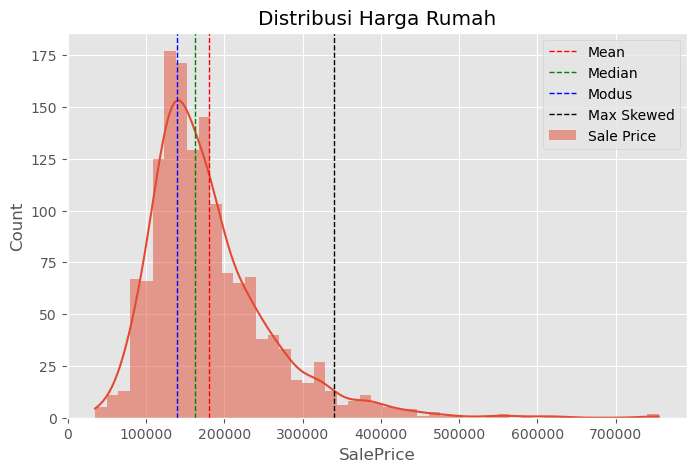

In [8]:
# Create histogram plot to show distribution of SalePrice

plt.figure(figsize = (8,5))
sns.histplot(x,label='Sale Price',kde=True, linewidth=0)
plt.axvline(x=mean,
            color='r',
            ls='--', 
            lw=1,
            label='Mean')
plt.axvline(x=med,
            color='g',
            ls='--', 
            lw=1,
            label='Median')
plt.axvline(x=x.mode()[0],
            color='b',
            ls='--', 
            lw=1,
            label='Modus')
plt.axvline(x=mx,
            color='k',
            ls='--', 
            lw=1,
            label='Max Skewed')
plt.title('Distribusi Harga Rumah')
plt.legend()
plt.show()

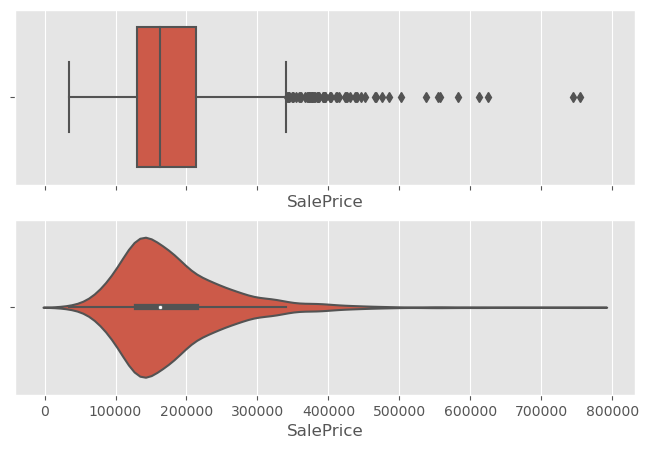

In [9]:
# Create boxplot and violinplot to show outlier data of SalePrice

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8,5))
sns.boxplot( x=x, data=train_df, ax=ax1);
sns.violinplot( x=x, data=train_df, ax=ax2);

#### Intepretasi dan analisa hasil grafik:

1. Harga rumah dominan (Modus) berada di angka 140.000
2. Harga rumah memusat (Mean) di sekitar angka 180.291,2
3. Harga rumah dengan titik lokasi tengah data (Median) ada di angka 163.000
4. Harga rumah dengan nilai diatas 340.037,5 dapat dianggap sebagai Outlier

Sehingga jika divisualkan akan membentuk grafik yang skewed ke kanan (positif) akibat nilai **mean > median**. Dengan ini, sebagai Tim Data Science menganjurkan untuk menganalisis melalui **nilai median** agar representatif dan dapat melalukan pendekatan pada hampir tiap jenis kondisi (mengikuti pedoman '**robust statistics**')

## No.4

**Karena ada pernyataan bahwa setiap tahunnya harga
rumah itu pasti naik.** (tahun terjual : YrSold, harga rumah :
SalePrice) Silahkan teman-teman buktikan dengan data yang
ada menggunakan ilmu statistika? (Tidak terbatas pada
pengujian apapun)

Pada data sudah dilakukan pengelompokan berdasarkan tahun (2006 - 2010). Uji hipotesis yang dilakukan yaitu **Analysis of variance (ANOVA)**. 

ANOVA merupakan pengujian terhadap **keragaman dari 
beberapa populasi**. Pengujian menggunakan sebaran-F 
(F-Distribution)

The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

1. The samples are independent.
2. Each sample is from a normally distributed population.
3. The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

In [10]:
q

,YrSold,count,mean,std,min,25%,50%,75%,max
0,2006,314.0,182549.458599,79426.838855,35311.0,131375.0,163995.0,218782.5,625000.0
1,2007,329.0,186063.151976,85768.171410,39300.0,129900.0,167000.0,219500.0,755000.0
2,2008,304.0,177360.838816,69735.610685,40000.0,131250.0,164000.0,207000.0,446261.0
3,2009,338.0,179432.103550,80879.237311,34900.0,125250.0,162000.0,212750.0,582933.0
4,2010,175.0,177393.674286,80451.280085,55000.0,128100.0,155000.0,213250.0,611657.0


Pada soal ini akan diuji sebuah hipotesis null **(H0)** yaitu **"Setiap tahunnya harga rumah itu tidak berubah"** dengan **nilai rerata** setiap populasi adalah **sama**. Hipotesis null akan diuji dengan nilai **p-value** dari uji ANOVA. Jika nilai p-value ≥ daripada batas yang diberikan maka kesimpulan yang dapat diambil **Tidak terdapat cukup bukti untuk menolak H0**.

Hipotesis yang berkebalikan dengan H0 disebut **H1** yaitu **"Setiap tahunnya harga rumah itu berubah (tidak dapat dipastikan naik/turun)"** seperti yang diminta oleh soal.

In [11]:
# Create dataset by YrSold
    
df_2006 = train_df[train_df.YrSold == 2006]['SalePrice']
df_2007 = train_df[train_df.YrSold == 2007]['SalePrice']
df_2008 = train_df[train_df.YrSold == 2008]['SalePrice']
df_2009 = train_df[train_df.YrSold == 2009]['SalePrice']
df_2010 = train_df[train_df.YrSold == 2010]['SalePrice']

In [12]:
# Test H0 ANOVA

statistic, p_value = st.f_oneway(df_2006, df_2007, df_2008, df_2009, df_2010, axis=0)

print('stat :',statistic,'and p_value :',p_value)

if p_value >= 0.05:
    print('Insufficient Reject H0')
else:
    print('Sufficient Reject H0')

stat : 0.6455252211679311 and p_value : 0.6300887663573457
Insufficient Reject H0


Hasil uji hipotesis menunjukkan bahwa p-value > alpha, maka kita akan mengambil keputusan bahwa tidak ada perbedaan signifikan antara harga rumah untuk setiap tahunnya.

Kesimpulan yang dapat diambil **Menerima H0** atau **Setiap tahunnya harga rumah itu tidak berubah**.

# Advanced

## No.5

Kasus yang akan digunakan adalah **membuka akun deposit untuk
nasabah bank**. Pada kesempatan kali ini data scientist diminta tolong
untuk menganalisa hasil ab-testing suatu perusahaan bank. Apakah
**jumlah campaign** mampu meningkatkan keinginan user untuk
**membuka akun deposit** atau tidak?

In [13]:
# Read dataset

r = r'bank\bank-full.csv'

df = pd.read_csv(r, sep = ';')

print(f'Shape of train data: {df.shape}')

df.head()

Shape of train data: (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
# Check duplicated data

df.duplicated().any()

False

### Pemahaman konsep A/B Testing

**A. Apa nama experimentnya?** <br />
Pengaruh jumlah campaign terhadap peningkatan jumlah user yang membuka akun deposit.

**B. Definisikan Hipotesis** <br />
Jika semakin banyak campaign yang telah dibuat, maka nasabah yang membuka akun deposit akan semakin banyak (Conversion rate meningkat).

**C. Siapa participant-nya?** <br />
Nasabah Bank yang akan dipilih secara acak.

**D. Variabel yang akan diuji apa?** <br />
Jumlah campaign yang dilakukan.

**E. Metrics apa yang akan digunakan?** <br />
Macroconversion: Conversion rate; seberapa efektif jumlah campaign agar sukses mengajak nasabah membuka akun deposit.

**F. Berapa sample size dan durasi experiment?** <br />
Dapat dilakukan dengan metode Slovin. <br />
Pada dataset terdapat 45.211 set data, jika nilai batas kesalahan yang diinginkan 5% maka sampel dapat dihitung sebagai berikut

In [15]:
N = df.shape[0]
e = 0.05

sm = N/(1+N*e**2) #Slovin method
print(f"Jumlah data yang digunakan sebagai sample yaitu {int(sm)}")

Jumlah data yang digunakan sebagai sample yaitu 396


Durasi experiment ditentukan juga berdasarkan ukuran sampel dan sifat dari nasabah (misal: Pada hari minggu, nasabah sedang libur sehingga tidak melihat campaign). Dalam masa pengujian A/B testing juga dianalisa setiap hari agar didapatkan jumlah sampel yang sesuai, sehingga hasil yang akan didapat akan lebih representatif.

Dengan durasi experiment yang disarankan yaitu selama 1 - 2 minggu. dengan durasi maksimal 4 minggu.

### Pengujian Hipotesis

**A. Penentuan hipotesis** <br />
H0 = Banyaknya campaign yang dilakukan tidak berpengaruh terhadap jumlah akun yang dibuat setelah campaign. <br />
H1 = Banyaknya campaign yang dilakukan berpengaruh terhadap jumlah akun yang dibuat setelah campaign.

**B. Pengujian yang digunakan** <br />
Metode pengujian yang dilakukan yaitu dengan T-Test.

**C. Deteksi asumsi beserta cara penanganannya** <br />
T-Test merupakan pengujian untuk rata-rata sample menggunakan sebaran-t (t-distribution). Uji T-Test biasa digunakan untuk membandingkan rata-rata 2 populasi. <br />

Assumption :
- Sample is normal distribution
- Or Huge Number of Sample (Central Limit Theorem)

Pada kasus ini kolom y merepresentasikan hasil user yang membuka akun deposit setelah campaign, kolom y  merupakan data kategorikal dengan 2 nilai populasi yaitu `yes` yang berarti sukses mangajak nasabah membuka akun dan `no` dengan arti sebaliknya. <br />

Penanganan asumsi dapat dilakukan dengan melihat **distribusi user untuk setiap campaign melalui grafik**.

### Data Visualization

In [16]:
# Distribution of users who voted yes and no after the campaign

p = df.groupby(['y']).describe().reset_index()

p[['y','campaign']]

y campaign                                              
          count      mean       std  min  25%  50%  75%   max
0   no  39922.0  2.846350  3.212767  1.0  1.0  2.0  3.0  63.0
1  yes   5289.0  2.141047  1.921826  1.0  1.0  2.0  3.0  32.0

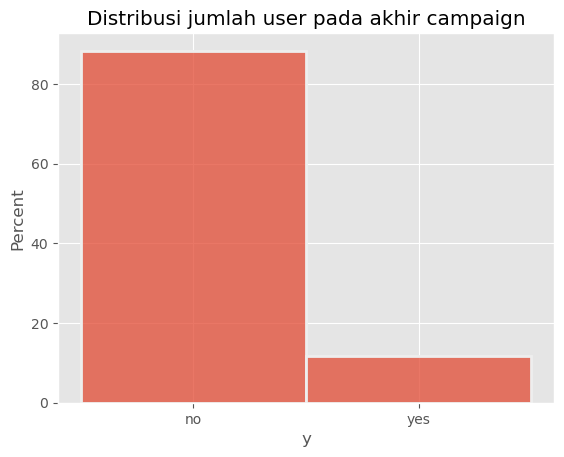

In [17]:
# Histogram plot

sns.histplot(df.y, linewidth=2, discrete=True, stat='percent')

plt.title('Distribusi jumlah user pada akhir campaign')
plt.show()

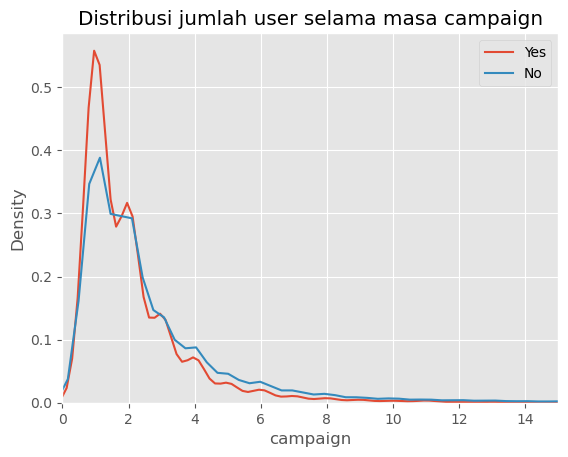

In [18]:
# Distribution of users who voted yes and no during the campaign

yes = df[df.y == 'yes']
no = df[df.y == 'no']

sns.kdeplot(yes.campaign, label='Yes')
sns.kdeplot(no.campaign, label='No')

plt.title('Distribusi jumlah user selama masa campaign')
plt.xlim(0, 15)
plt.legend()
plt.show()

Berdasarkan grafik kde yang didapat bahwa pada **awal campaign** beberapa customer **banyak yang tertarik** untuk membuka akun deposit baru, namun pada campaign berikutnya minat customer **cenderung menurun** hingga campaign ke 15.  

### Hasil Pengujian Hipotesis

In [19]:
# Test H0 T-Test

statistic, p_value = st.ttest_ind(a = yes.campaign, b=no.campaign)

print('stat :',statistic,'and p_value :',p_value)

if p_value >= 0.05:
    print('Insufficient Reject H0')
else:
    print('Sufficient Reject H0')

stat : -15.599948860003783 and p_value : 1.0123473642096295e-54
Sufficient Reject H0


In [20]:
# Hypothesis Testing using chi-square
stat, p_value= st.mannwhitneyu(yes['campaign'],no['campaign'])

print('stat :',stat,'and p_value :',p_value)

if p_value >= 0.05:
    print('Insufficient Reject H0')
else:
    print('Sufficient Reject H0')

stat : 90300543.5 and p_value : 1.9484904873905108e-71
Sufficient Reject H0


### Kesimpulan dan interpretasi

Berdasarkan hasil pengujian T-Test didapatkan hasil p-value < 0.05 kesimpulan yang dapat diambil **Terdapat cukup bukti untuk menolak H0** atau **banyaknya campaign yang dilakukan berpengaruh terhadap jumlah akun yang dibuat setelah campaign**.

Jika dilihat dari data rerata user yang memilih `yes` lebih kecil daripada user yang memilih `no`, sehingga juga dapat diambil kesimpulan **Campaign yang berulang akan cenderung menurunkan minat user untuk membuat akun baru**.  